<a href="https://colab.research.google.com/github/tincho-mehaudy/DMCyT/blob/master/TP1_Consigna1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install spotipy
!pip -q install -U librosa
#!wget -q https://www.dropbox.com/s/nqjs076fidighaz/SopSax.NoVib.mf.C4B4.wav?dl=1 -O SopSax.NoVib.mf.C4B4.wav

     |████████████████████████████████| 184kB 2.8MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 


In [3]:
import matplotlib.pyplot as plt
import pandas as pd 
import spotipy 
import librosa
import librosa.display
import numpy as np
import matplotlib as mpl
import urllib.request
import seaborn as sns
import tqdm
import scipy
import joblib
from pathlib import Path
from IPython.display import Audio, Markdown, Image
from spotipy.oauth2 import SpotifyClientCredentials

# Números y Datos
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.interpolate import interp1d

# Análisis de sonido
import librosa
import librosa.display
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials 

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sns.set_context('poster')

# Consigna 1:

Utilizando la API de Spotify se descargó la información de 4092 pistas de audio. Cada registro tiene variables de features de alto (*audio_features*), bajo nivel (*audio_analysis*) y metadata de los tracks. La idea es limpiar los campos a utilizar y hacer un primer análisis de los datos.

Para facilitar los primeros pasos utilizar una pequeña porción aleatoria de los datos e ir aumentando progresivamente. Observación: los datos de *audio_analysis* pesan 1.3 GB

# Dataset *tracks* 

-   De los datos de *tracks*, separar las etiquetas que se podrán utilizar para la validación externa (Artista, Álbum, Año, Género), de los campos que no se utilizarán.

# Dataset *audio_features*

El dataset *audio_features* contiene 9 atributos globales de alto nivel para cada pista de audio.

-   Con los datos de *audio_features*, generar un gráfico tipo *scatter matrix*.

-   Identificar variables más o menos informativas *a priori* y variables que requieran, además de la estandarización, alguna corrección para asimilar la distribución a una normal.

-   Estandarizar y volver a generar un gráfico tipo *scatter matrix*.

-   Identificar, si es que hay, valores extremos que sea necesario descartar.

# Dataset *audio_analysis*

El dataset *audio_analysis* contiene las variables continuas de bajo nivel, estimadas en ventanas temporales, como *timbre* o *pitches*. Como primer paso, deberán:

-   Resumir estas variables en valores por canción. Por ejemplo, tomar el promedio o el desvío estándar del timbre entre todas las ventanas, obteniendo 12 valores de timbre promedio y 12 valores de desvío estándar del timbre por canción.

-   Contruir un *data frame* con estos valores.

-   Generar un gráfico tipo *scatter matrix*.

-   Identificar variables más o menos informativas *a priori* y variables que requieran, además de la estandarización, alguna corrección para asimilar la distribución a una normal.

-   Estandarizar y volver a generar un gráfico tipo *scatter matrix*.

-   Identificar, si es que hay, valores extremos que sea necesario descartar.

## Bajamos los datos 



In [4]:
!wget https://www.dropbox.com/s/ms6260jqmsmz5qu/audio_features.pickle?dl=1 -O audio_features.pickle
!wget https://www.dropbox.com/s/8d0y9bms80ly8ui/tracks.pickle?dl=1 -O tracks.pickle
!wget https://www.dropbox.com/s/1cmb8e8zvv6hsfs/audio_analysis.pickle?dl=1 -O audio_analysis.pickle

--2020-09-29 12:11:43--  https://www.dropbox.com/s/ms6260jqmsmz5qu/audio_features.pickle?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/ms6260jqmsmz5qu/audio_features.pickle [following]
--2020-09-29 12:11:43--  https://www.dropbox.com/s/dl/ms6260jqmsmz5qu/audio_features.pickle
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6c30c4551758f4e586683755d8.dl.dropboxusercontent.com/cd/0/get/BASrc5p-dqYimwQswd4x8ofRSvnCGj5aaf4FPgM3dPDECNPqtYJYUJFeWJqgO-OCG6fcktjL5uTR2ORSr8kdqXcvJVKgw3mojPTqyG6GLpQ5U4YkBiWM1yqGFh5U4fjp5sU/file?dl=1# [following]
--2020-09-29 12:11:44--  https://uc6c30c4551758f4e586683755d8.dl.dropboxusercontent.com/cd/0/get/BASrc5p-dqYimwQswd4x8ofRSvnCGj5aaf4FPgM3dPDECNPqtYJYUJFeWJqgO-OCG6fcktjL5uTR2ORSr8

In [5]:
import pandas as pd
import numpy as np

df_af = pd.read_pickle('audio_features.pickle')
df_tracks = pd.read_pickle('tracks.pickle')
df_aa = pd.read_pickle('audio_analysis.pickle')

# Dataset *tracks* 

-   De los datos de *tracks*, separar las etiquetas que se podrán utilizar para la validación externa (Artista, Álbum, Año, Género), de los campos que no se utilizarán.

In [6]:
df_tracks.head()

album  ... genre
id                                                                         ...      
4d3XHYFFuYYzxWr2cJ6yQl  {'album_type': 'ALBUM', 'artists': [{'external...  ...  jazz
3X3p3u03P8eFL8WTH0oaaU  {'album_type': 'ALBUM', 'artists': [{'external...  ...  jazz
4KlXeaheot0OI9PoOWspvZ  {'album_type': 'ALBUM', 'artists': [{'external...  ...  jazz
3j76McoUI18gDoqxYE14Bu  {'album_type': 'ALBUM', 'artists': [{'external...  ...  jazz
4zxd4tiXPlWMqoJltbVTbE  {'album_type': 'ALBUM', 'artists': [{'external...  ...  jazz

[5 rows x 17 columns]

In [7]:
df_tracks.columns

Index(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local', 'name',
       'popularity', 'preview_url', 'track_number', 'type', 'uri', 'genre'],
      dtype='object')

In [8]:
df_tracks2 = df_tracks[['artists','album','genre']]
df_tracks2['release_date'] =df_tracks2['album'].apply(pd.Series)['release_date'].apply(str)
df_tracks2['release_date'] =df_tracks2['release_date'].str.slice(0, 4)

df_tracks2['album_name'] =df_tracks2['album'].apply(pd.Series)['name'].apply(str)

df_tracks2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

artists  ...                     album_name
id                                                     ...                               
4d3XHYFFuYYzxWr2cJ6yQl                 Tommy Flanagan  ...                    Master Trio
3X3p3u03P8eFL8WTH0oaaU                     Art Farmer  ...                     Modern Art
4KlXeaheot0OI9PoOWspvZ  Christian Scott aTunde Adjuah  ...     Christian Scott Collection
3j76McoUI18gDoqxYE14Bu                        Skalpel  ...                        Transit
4zxd4tiXPlWMqoJltbVTbE                    Miles Davis  ...  Kind Of Blue (Legacy Edition)

[5 rows x 5 columns]

In [9]:
# vemos los valores que no tenian fecha
df_tracks2[df_tracks2['release_date']=='0000']

artists  ...                                    album_name
id                                      ...                                              
2qij1qbQCOkjB8gsu3Y5lH    Super8 & Tab  ...                       Black Is The New Yellow
0gAD3qvhN777Izfn3sRjiN    Super8 & Tab  ...  Above & Beyond Presents Anjunabeats Volume 5
5tmXe6SOpaA2KnNoBgI42R  Above & Beyond  ...  Above & Beyond Presents Anjunabeats Volume 5

[3 rows x 5 columns]

In [10]:
# completo los valores faltantes
df_tracks2.loc['2qij1qbQCOkjB8gsu3Y5lH','release_date']='2010'
df_tracks2.loc['0gAD3qvhN777Izfn3sRjiN','release_date']='2007'
df_tracks2.loc['5tmXe6SOpaA2KnNoBgI42R','release_date']='2007'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid d

# Dataset *audio_features*

El dataset *audio_features* contiene atributos globales de alto nivel para cada pista de audio.

-   Con los datos de *audio_features*, generar un gráfico tipo *scatter matrix*.

-   Identificar variables más o menos informativas *a priori* y variables que requieran, además de la estandarización, alguna corrección para asimilar la distribución a una normal.

-   Estandarizar y volver a generar un gráfico tipo *scatter matrix*.

-   Identificar, si es que hay, valores extremos que sea necesario descartar.


In [11]:
df_af.head()

danceability  energy  ...  duration_ms  time_signature
id                                            ...                             
6avAsaa2IsXHT2mtQ6cGVe        0.6040  0.9630  ...       388663               4
6fvu2d6gHAdiNCMco4lTxK        0.0677  0.0581  ...       283653               3
5GmrXcVIMgLaaqKVxhi5kp        0.2590  0.2420  ...       213640               3
1DMIHggF47tqsO468VUDmd        0.2420  0.4450  ...       247933               4
78Ovt1QkZbU1QBMKWpcXPy        0.7010  0.8060  ...       168112               4

[5 rows x 17 columns]

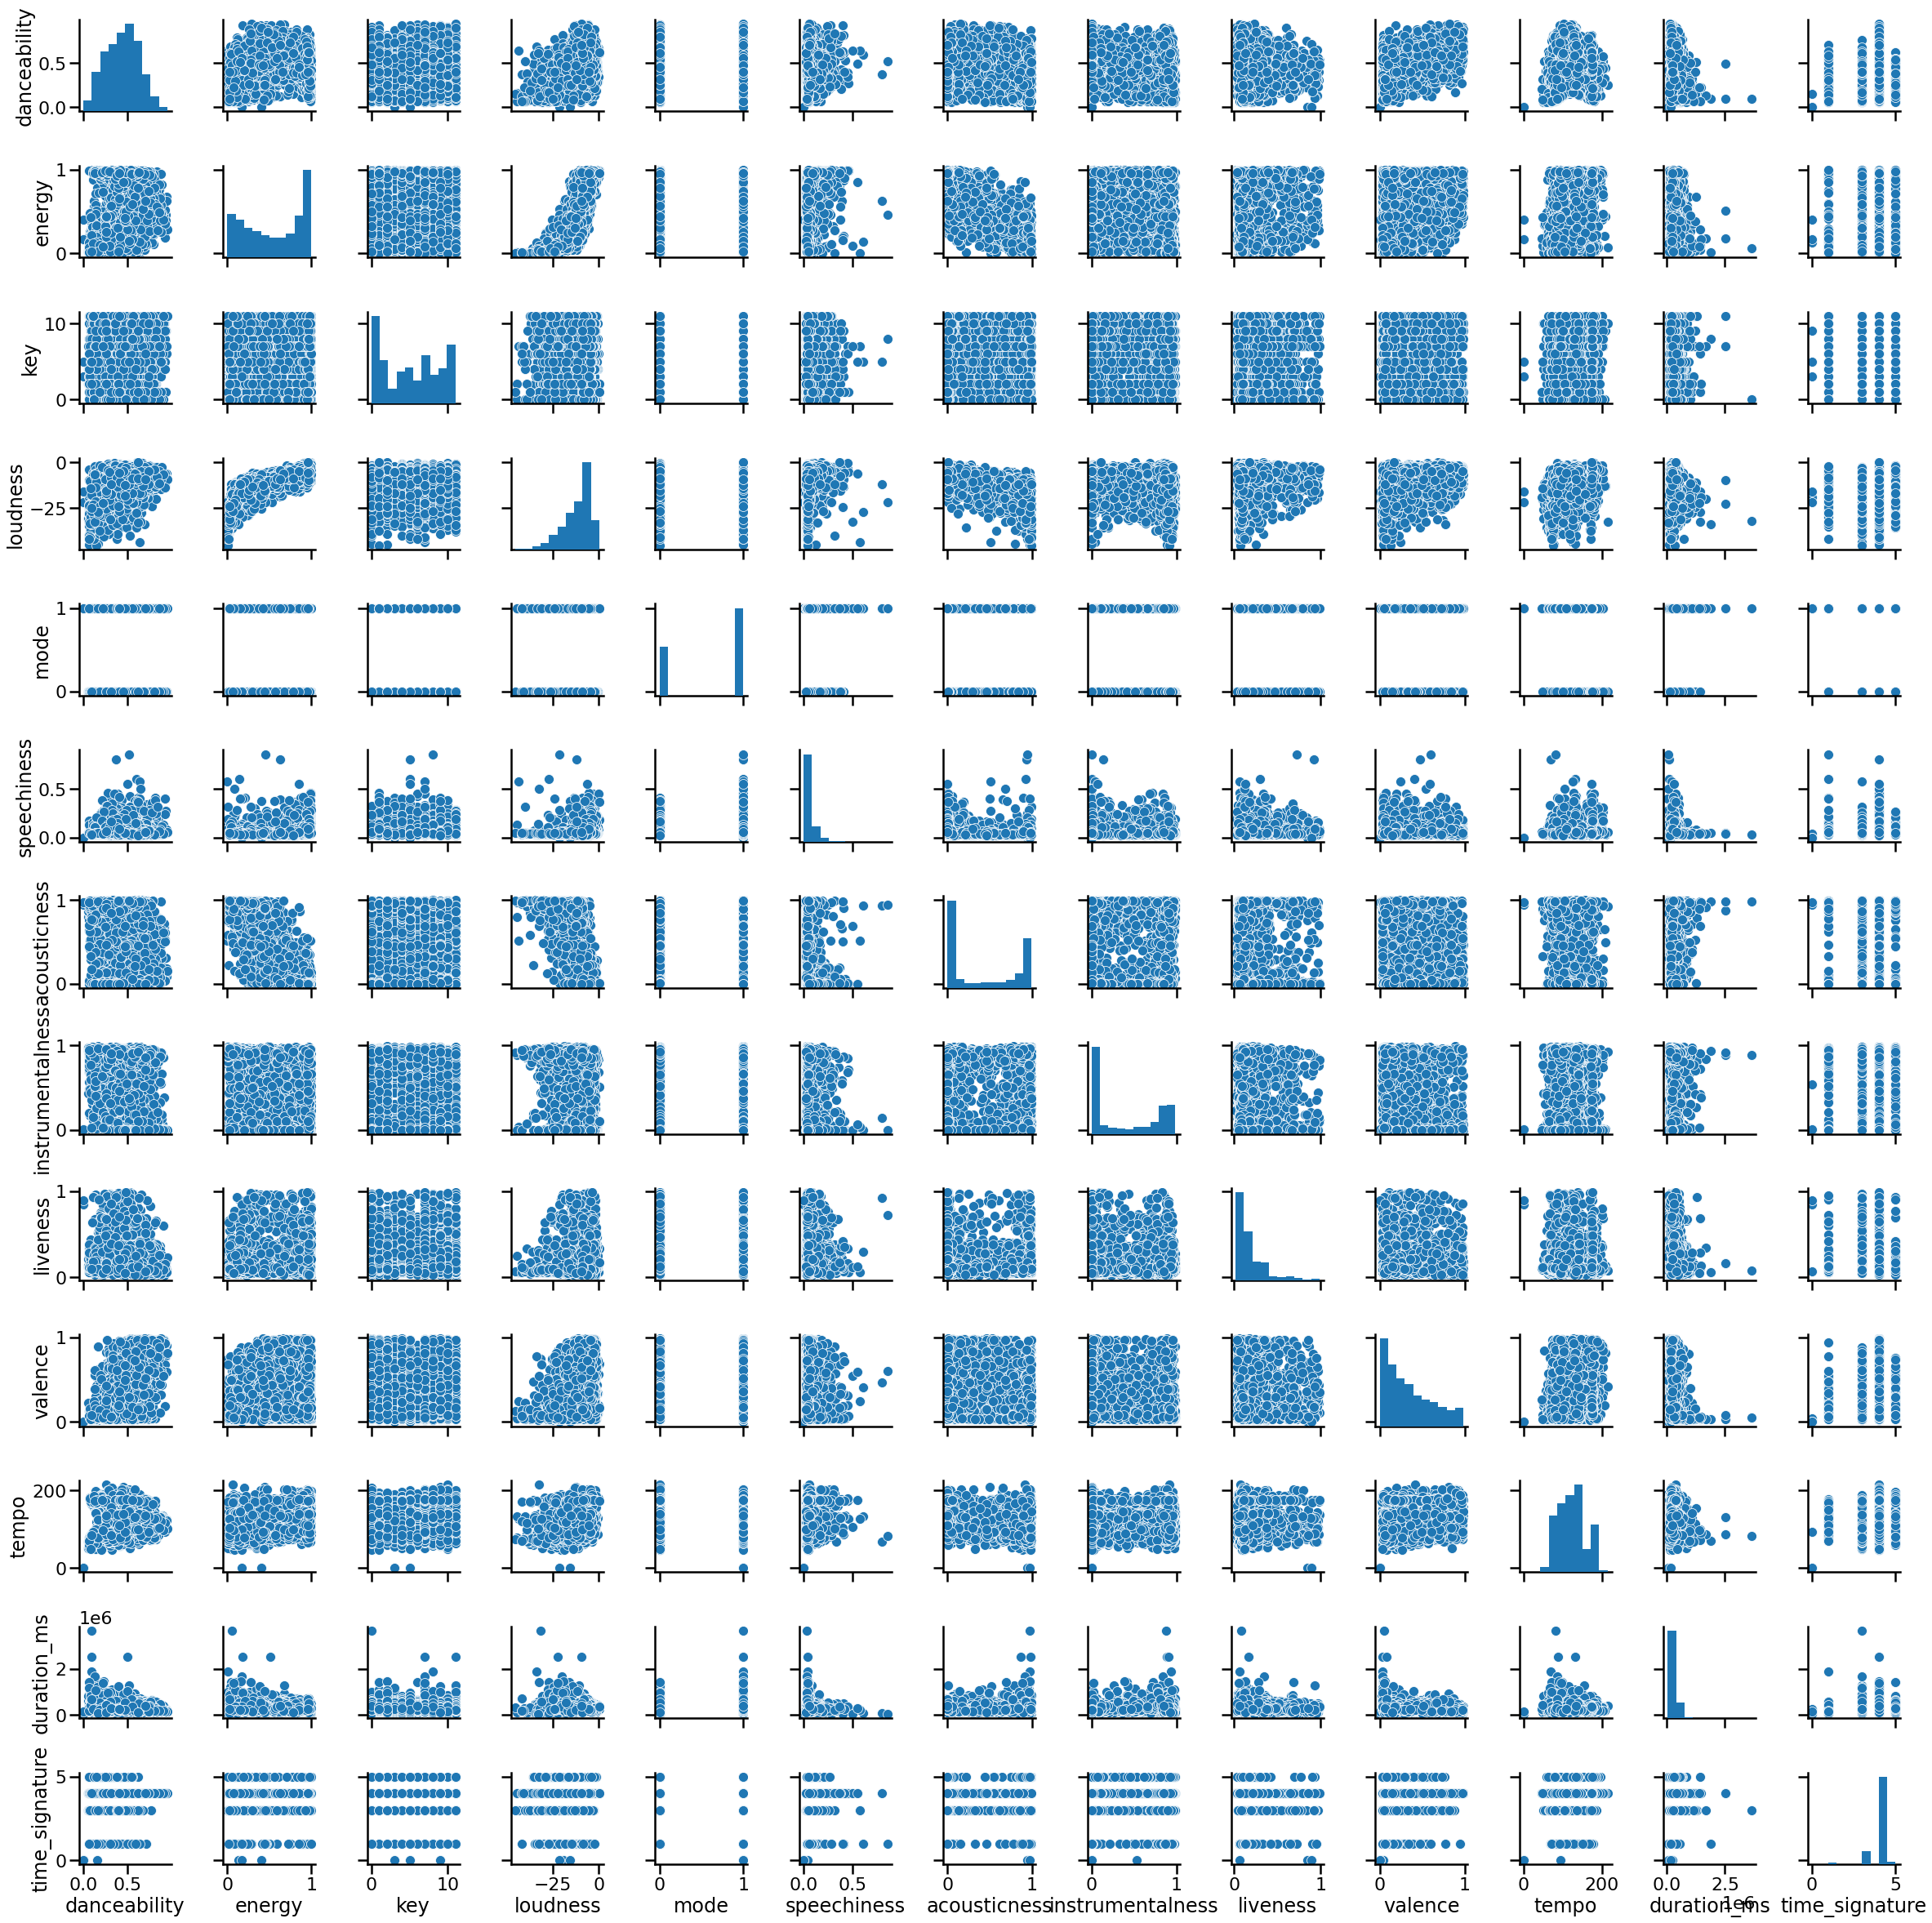

In [12]:
sns.pairplot(df_af);

In [13]:
# sacamos las variables string
df_af.drop('analysis_url', inplace=True, axis=1)
df_af.drop('track_href', inplace=True, axis=1)
df_af.drop('uri', inplace=True, axis=1)
df_af.drop('type', inplace=True, axis=1)

# y las categoricas
df_af.drop('key', inplace=True, axis=1)
df_af.drop('mode', inplace=True, axis=1)
df_af.drop('time_signature', inplace=True, axis=1)

In [14]:
df_af.corr()
# existe alta correlacion entre 
# acousticness/energy, 
# acousticness/loudness,
# loudness/energy
# queda pendiente ver con el grupo cuales eliminamos

danceability    energy  ...     tempo  duration_ms
danceability          1.000000  0.302459  ...  0.205519    -0.087575
energy                0.302459  1.000000  ...  0.437383    -0.052145
loudness              0.405870  0.860182  ...  0.408409    -0.091050
speechiness           0.019451  0.344713  ...  0.141486    -0.095760
acousticness         -0.339075 -0.895236  ... -0.419675    -0.014671
instrumentalness     -0.193985 -0.078853  ... -0.027595     0.272892
liveness             -0.033091  0.175633  ...  0.071132    -0.025698
valence               0.587137  0.339275  ...  0.186940    -0.217588
tempo                 0.205519  0.437383  ...  1.000000    -0.003667
duration_ms          -0.087575 -0.052145  ... -0.003667     1.000000

[10 rows x 10 columns]

In [15]:
df_af.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

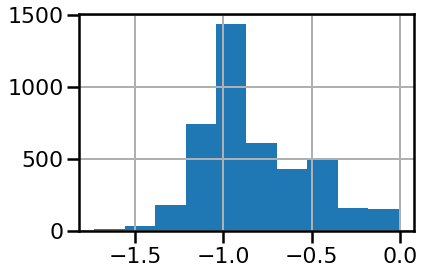

In [16]:
# transformamos al normal algunas variables
df_af['liveness_log']=np.log10(df_af['liveness'])
df_af['liveness_log'].hist()
df_af.drop('liveness', inplace=True, axis=1)

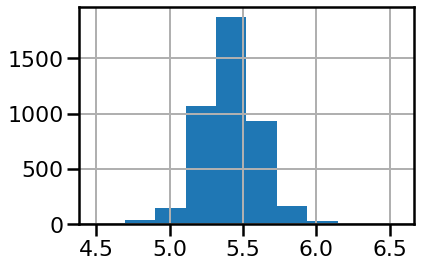

In [17]:
# transformamos al normal algunas variables
df_af['duration_ms_log']=np.log10(df_af['duration_ms'])
df_af['duration_ms_log'].hist()
df_af.drop('duration_ms', inplace=True, axis=1)

In [18]:
def logit(x):
  return np.log(1/((1/x)-1))

In [19]:
def expo(x):
  return np.exp((1/x))

In [20]:
def expo2(x):
  return np.exp(np.log10(x))

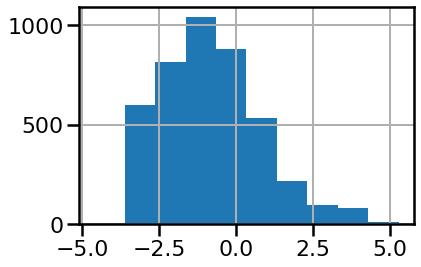

In [21]:
# transformamos al normal algunas variables
df_af['valence_log']=(df_af['valence']+0.01).apply(logit)
df_af['valence_log'].hist()
df_af.drop('valence', inplace=True, axis=1)

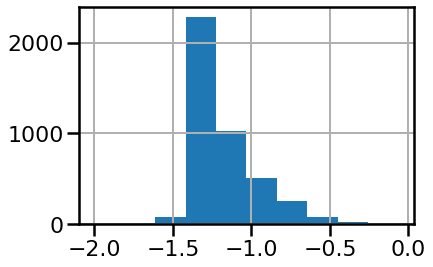

In [22]:
# transformamos al normal algunas variables
df_af['speechiness_log']=(df_af['speechiness']+0.01).apply(np.log10)
df_af['speechiness_log'].hist()
df_af.drop('speechiness', inplace=True, axis=1)



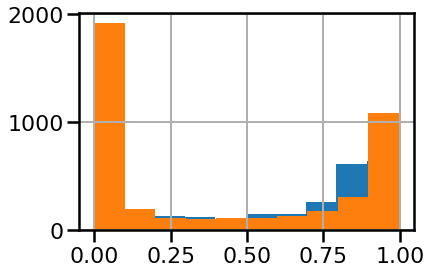

In [27]:
# queda pendiente seguir transformando las variables que no tienen distribucion normal
df_af['instrumentalness'].hist()
df_af['acousticness'].hist()


In [28]:
# estandrarizamos por mix y max
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_af)
df_af_scale = pd.DataFrame(scaled_df,columns=df_af.columns)
df_af_scale.head()

danceability    energy  ...  valence_log  speechiness_log
0      0.638478  0.964909  ...     0.371680         0.583242
1      0.071564  0.057668  ...     0.160805         0.361557
2      0.273784  0.242044  ...     0.386136         0.361110
3      0.255814  0.445569  ...     0.238732         0.320521
4      0.741015  0.807503  ...     0.887878         0.618496

[5 rows x 10 columns]

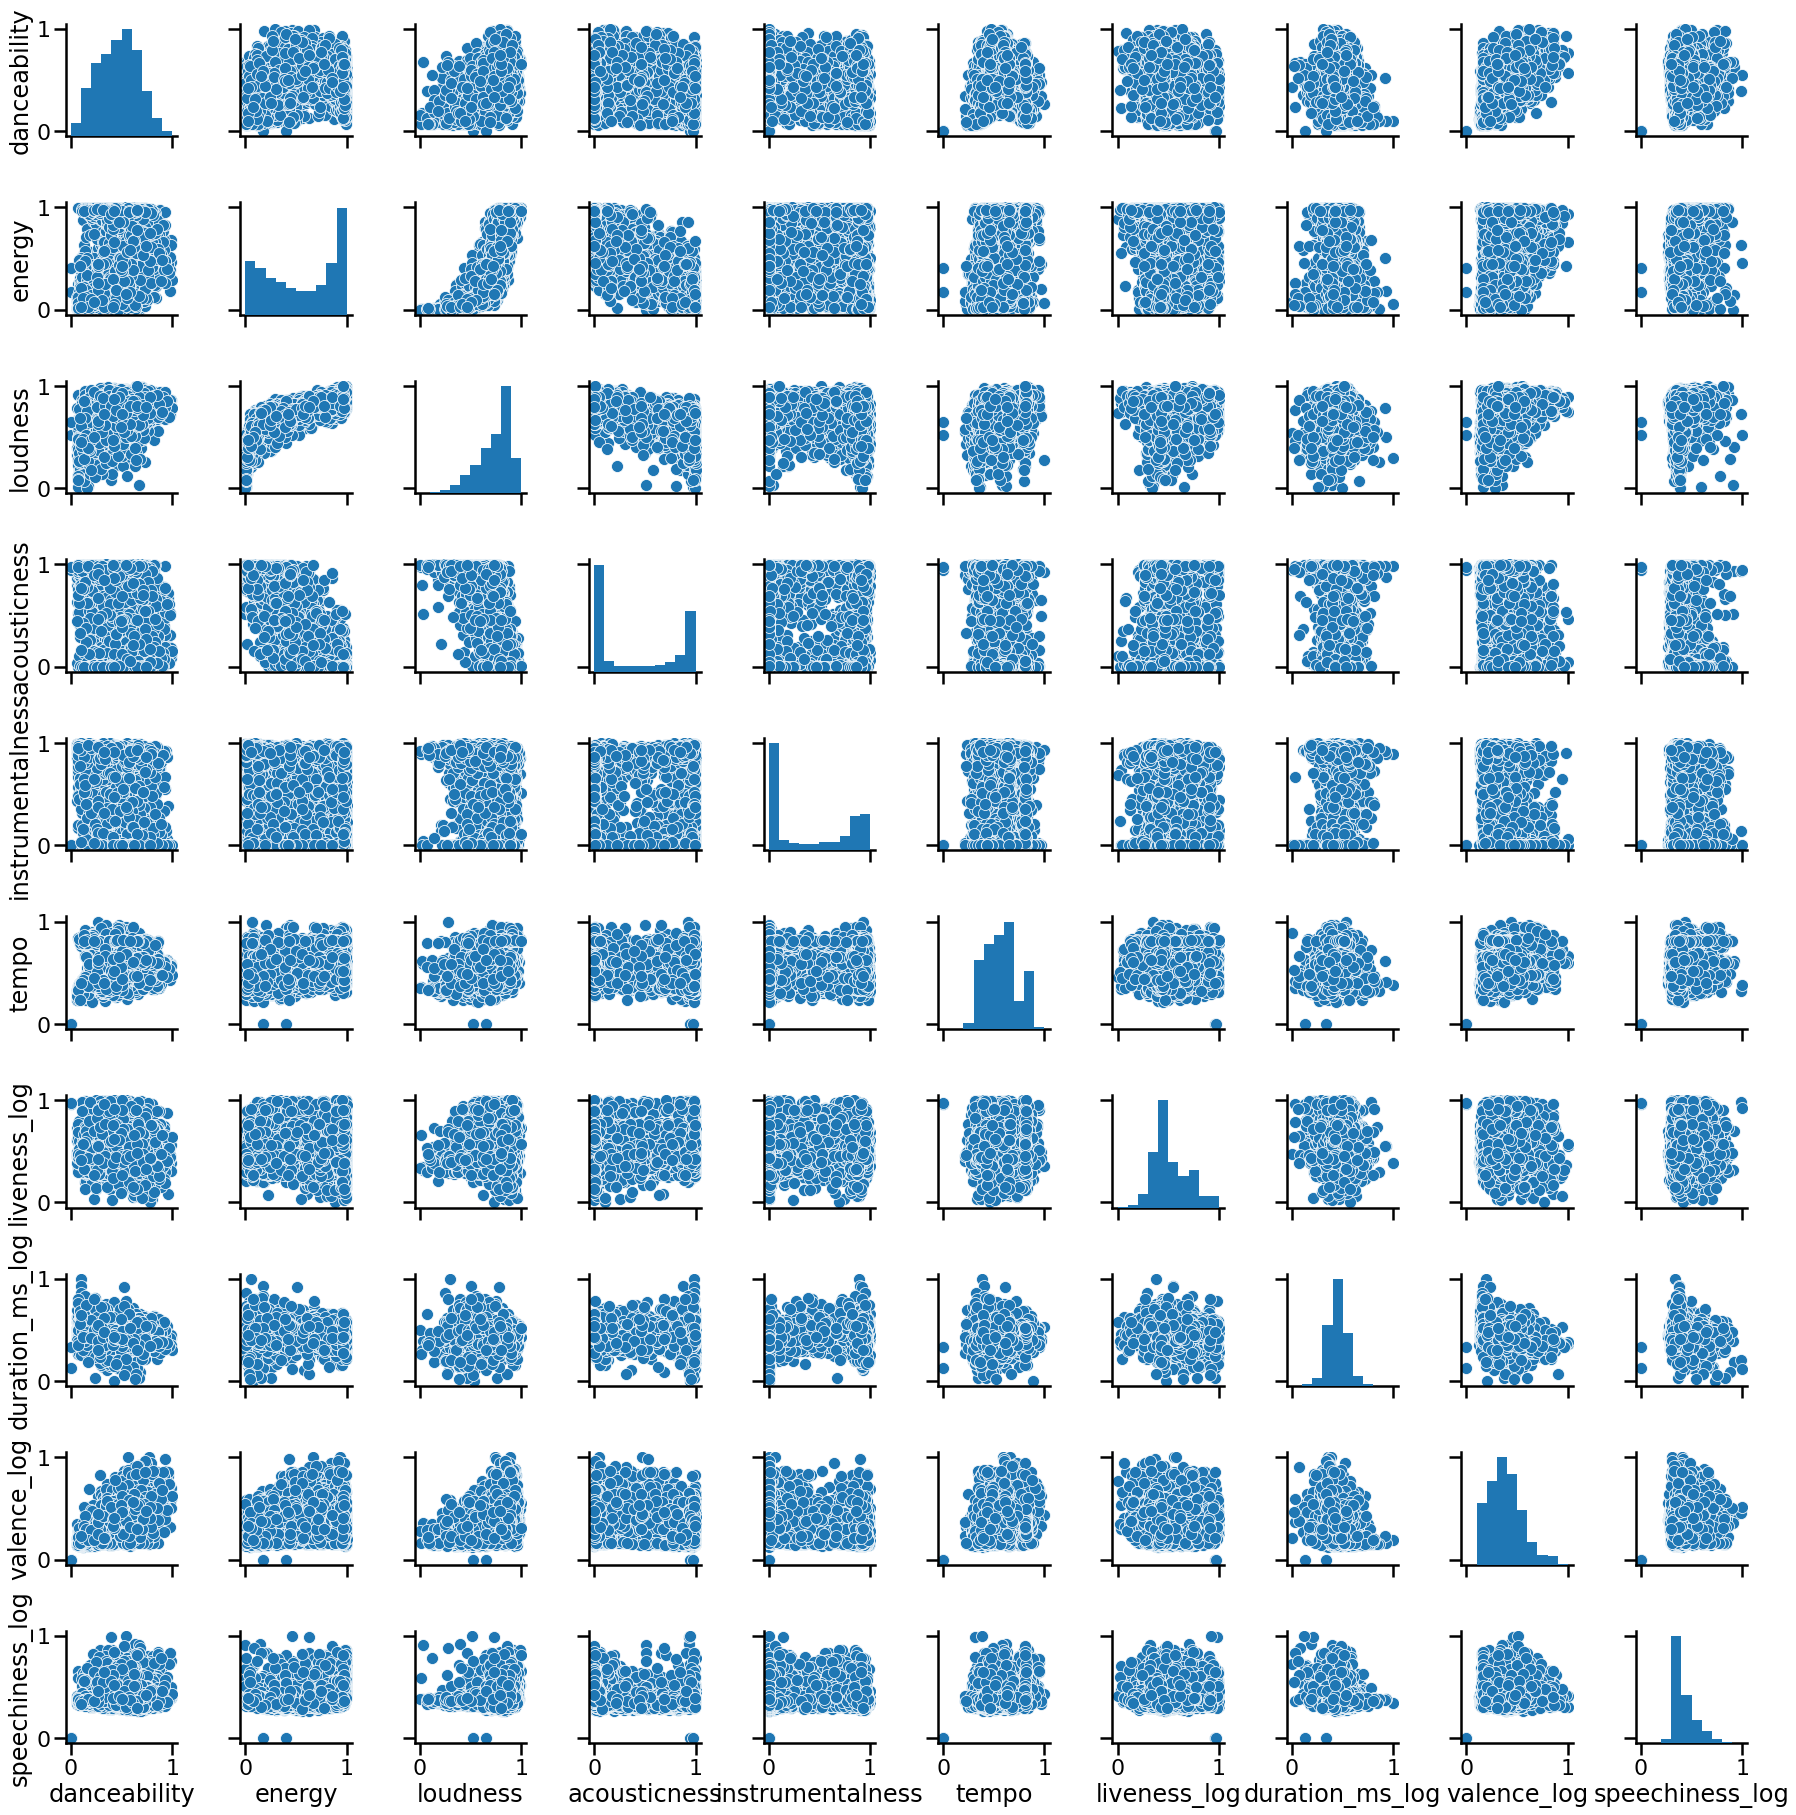

In [25]:
sns.pairplot(df_af_scale);

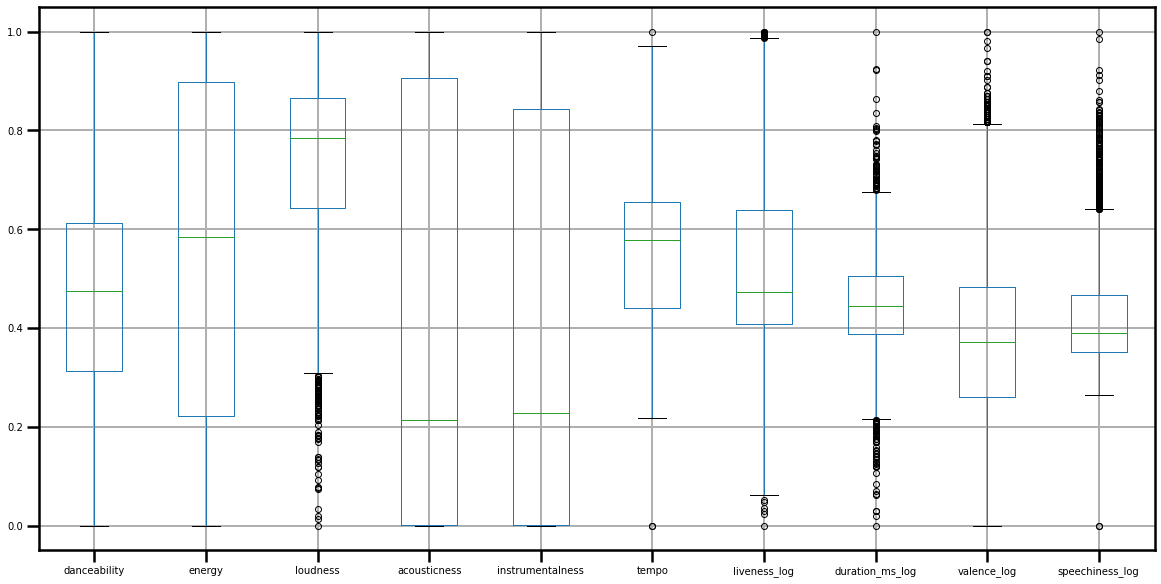

In [26]:
# outliers univariados
df_af_scale.boxplot(fontsize=10,grid=True, figsize=(20,10))

# faltaria ver que hacemos con los outliers univariados y multivariados


# Dataset *audio_analysis*

El dataset *audio_analysis* contiene las variables continuas de bajo nivel, estimadas en ventanas temporales, como *timbre* o *pitches*. Como primer paso, deberán:

-   Resumir estas variables en valores por canción. Por ejemplo, tomar el promedio o el desvío estándar del timbre entre todas las ventanas, obteniendo 12 valores de timbre promedio y 12 valores de desvío estándar del timbre por canción.

-   Contruir un *data frame* con estos valores.

-   Generar un gráfico tipo *scatter matrix*.

-   Identificar variables más o menos informativas *a priori* y variables que requieran, además de la estandarización, alguna corrección para asimilar la distribución a una normal.

-   Estandarizar y volver a generar un gráfico tipo *scatter matrix*.

-   Identificar, si es que hay, valores extremos que sea necesario descartar.

In [29]:
df_aa.head()

start  ...                      id
0  0.00000  ...  6avAsaa2IsXHT2mtQ6cGVe
1  0.33061  ...  6avAsaa2IsXHT2mtQ6cGVe
2  0.69542  ...  6avAsaa2IsXHT2mtQ6cGVe
3  1.22544  ...  6avAsaa2IsXHT2mtQ6cGVe
4  1.66603  ...  6avAsaa2IsXHT2mtQ6cGVe

[5 rows x 10 columns]

In [32]:
df_aa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4504350 entries, 0 to 1676
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   start              float64
 1   duration           float64
 2   confidence         float64
 3   loudness_start     float64
 4   loudness_max_time  float64
 5   loudness_max       float64
 6   loudness_end       float64
 7   pitches            object 
 8   timbre             object 
 9   id                 object 
dtypes: float64(7), object(3)
memory usage: 378.0+ MB


In [30]:
df_aa.columns

Index(['start', 'duration', 'confidence', 'loudness_start',
       'loudness_max_time', 'loudness_max', 'loudness_end', 'pitches',
       'timbre', 'id'],
      dtype='object')

In [33]:
# vemos cuantos ids distintos tienen
df_aa['id'].value_counts()

4IIt36M11AQ5bHdzFQLEny    12374
4t3Yh6tKkxXrc458pNI7zZ     9519
0Ne5itrohiBOTy425hrBGJ     5622
7q85l1IotccRFlv3GgsvEU     5517
3kXJcMyhICI8U85Ce0WAED     5384
                          ...  
032rrZGB7Dr0YAcdgG31vV       97
0nNiyH4NViNdsL0JJz5yce       93
7DhJg9jCPljVOmUTXQ7dCy       73
0wvbb2MxlokwqSvbeoOOHv       65
6yYV3V3jqeWXinATQmngVc       57
Name: id, Length: 4177, dtype: int64

In [34]:
a=df_aa[df_aa['id']=='00At7PWydsvg7g5xgaYan9']['timbre'].apply(pd.Series)
#a[0].mean()
a

0        1        2        3   ...      8       9        10      11
0     0.000  171.130    9.469  -28.480  ... -27.228   0.973  -10.640  -7.228
1    37.641  -77.643  -30.613  137.462  ...  -7.170  -1.994  -15.695   9.411
2    38.171  -17.741  -22.798  149.223  ... -25.795  -1.903  -21.908  15.934
3    38.355   38.741    9.159  164.086  ... -19.636   8.674  -18.950   6.718
4    40.292   38.220  -50.706  130.054  ... -21.086  20.443  -27.538  25.327
..      ...      ...      ...      ...  ...     ...     ...      ...     ...
886  56.824  169.002   50.893   -4.497  ...  -8.619  -1.390  -22.228  -9.742
887  56.501  125.219   92.821  -10.895  ...  -5.209  14.087  -17.509 -22.331
888  56.087  120.727   85.559   53.613  ... -21.318 -11.279  -21.996   7.502
889  57.070  126.266   65.693   20.776  ...  -0.312   1.195    8.402  -1.765
890  37.927   96.938 -156.444  434.485  ...   2.623 -45.758 -117.672   4.521

[891 rows x 12 columns]

In [35]:
b=df_aa[df_aa['id']=='00At7PWydsvg7g5xgaYan9']
b

start  ...                      id
0      0.00000  ...  00At7PWydsvg7g5xgaYan9
1      0.24381  ...  00At7PWydsvg7g5xgaYan9
2      0.41873  ...  00At7PWydsvg7g5xgaYan9
3      0.59202  ...  00At7PWydsvg7g5xgaYan9
4      0.76553  ...  00At7PWydsvg7g5xgaYan9
..         ...  ...                     ...
886  192.48766  ...  00At7PWydsvg7g5xgaYan9
887  192.64432  ...  00At7PWydsvg7g5xgaYan9
888  192.87060  ...  00At7PWydsvg7g5xgaYan9
889  192.98690  ...  00At7PWydsvg7g5xgaYan9
890  193.32944  ...  00At7PWydsvg7g5xgaYan9

[891 rows x 10 columns]

In [36]:
df_aa.shape

(4504350, 10)

In [37]:
gp = df_aa.groupby('id')
gp.first()

start  ...                                             timbre
id                             ...                                                   
00At7PWydsvg7g5xgaYan9    0.0  ...  [0.0, 171.13, 9.469, -28.48, 57.491, -50.067, ...
00BgcUYkIImsDN5rNjkR1U    0.0  ...  [39.206, 168.479, -97.004, 66.837, 91.935, -59...
00WgnFIsY1y84p7mYAJRuF    0.0  ...  [0.134, 170.681, 11.306, -32.086, 57.232, -51....
00X2ieWUjpzdNwDU2Jlg6i    0.0  ...  [0.0, 171.13, 9.469, -28.48, 57.491, -50.067, ...
00isAURAZeKQXv6CW2vckb    0.0  ...  [1.48, 137.847, -22.243, -63.484, 41.726, -45....
...                       ...  ...                                                ...
7zKweXON2KcgXizqUcu7lf    0.0  ...  [28.992, 158.807, 115.118, -396.881, -9.121, 1...
7zbRQboW74uyd6gp4zxZx0    0.0  ...  [22.317, 95.959, 42.215, -161.623, 15.791, 124...
7zjWtWDCNgeXSY78nLzBQJ    0.0  ...  [0.0, 171.13, 9.469, -28.48, 57.491, -50.067, ...
7zkLpY72g6lKQbiHDqri1S    0.0  ...  [0.205, 166.546, 5.083, -34.358, 54.566, -51.0...
7zmgGJrQoOOSrkEoJDVeR2    0.0  ...  [29.085, 80.626, 95.086, -419.819, 53.045, 139...

[4177 rows x 9 columns]

In [38]:
gp.count()
# tienen que haber 4177 grupos en total

start  duration  ...  pitches  timbre
id                                       ...                 
00At7PWydsvg7g5xgaYan9    891       891  ...      891     891
00BgcUYkIImsDN5rNjkR1U    993       993  ...      993     993
00WgnFIsY1y84p7mYAJRuF   1476      1476  ...     1476    1476
00X2ieWUjpzdNwDU2Jlg6i    581       581  ...      581     581
00isAURAZeKQXv6CW2vckb    815       815  ...      815     815
...                       ...       ...  ...      ...     ...
7zKweXON2KcgXizqUcu7lf    822       822  ...      822     822
7zbRQboW74uyd6gp4zxZx0    649       649  ...      649     649
7zjWtWDCNgeXSY78nLzBQJ    680       680  ...      680     680
7zkLpY72g6lKQbiHDqri1S    760       760  ...      760     760
7zmgGJrQoOOSrkEoJDVeR2    922       922  ...      922     922

[4177 rows x 9 columns]

In [39]:
#armo las variables que va a tener mi dataframe final
lista_col=[]
# agrego el id
lista_col.append('id')
# agrego las medias y el desvio estandar de los picth por columna
lista_col.extend(list('mean_pitch' + str(i) for i in range(12) ))
lista_col.extend(list('sd_pitch' + str(i) for i in range(12) ))
#agrego las medias y el desvio estandar de los timbres por columna
lista_col.extend(list('mean_timbre' + str(i) for i in range(12) ))
lista_col.extend(list('sd_timbre' + str(i) for i in range(12) ))
# agrego las medias y los desvio estandar de las demas variables
lista_col.extend(['mean_start','sd_start', 
                  'mean_duration','sd_duration', 
                  'mean_confidence','sd_confidence', 
                  'mean_loudness_start','sd_loudness_start',
                  'mean_loudness_max_time','sd_loudness_max_time',
                  'mean_loudness_max', 'sd_loudness_max',
                  'mean_loudness_end','sd_loudness_end'])
df_aux= pd.DataFrame(columns=lista_col)


In [ ]:
# estructura que va a tener el dataframe de df_aa resumido
df_aux.columns

Index(['id', 'mean_pitch0', 'mean_pitch1', 'mean_pitch2', 'mean_pitch3',
       'mean_pitch4', 'mean_pitch5', 'mean_pitch6', 'mean_pitch7',
       'mean_pitch8', 'mean_pitch9', 'mean_pitch10', 'mean_pitch11',
       'sd_pitch0', 'sd_pitch1', 'sd_pitch2', 'sd_pitch3', 'sd_pitch4',
       'sd_pitch5', 'sd_pitch6', 'sd_pitch7', 'sd_pitch8', 'sd_pitch9',
       'sd_pitch10', 'sd_pitch11', 'mean_timbre0', 'mean_timbre1',
       'mean_timbre2', 'mean_timbre3', 'mean_timbre4', 'mean_timbre5',
       'mean_timbre6', 'mean_timbre7', 'mean_timbre8', 'mean_timbre9',
       'mean_timbre10', 'mean_timbre11', 'sd_timbre0', 'sd_timbre1',
       'sd_timbre2', 'sd_timbre3', 'sd_timbre4', 'sd_timbre5', 'sd_timbre6',
       'sd_timbre7', 'sd_timbre8', 'sd_timbre9', 'sd_timbre10', 'sd_timbre11',
       'mean_start', 'sd_start', 'mean_duration', 'sd_duration',
       'mean_confidence', 'sd_confidence', 'mean_loudness_start',
       'sd_loudness_start', 'mean_loudness_max_time', 'sd_loudness_max_time',
    

In [40]:
rows_df=[]
i=0
for fila_id, grupo in gp:
  i=i+1

  # aplico series a los pitch y timbres para poder trabajarlos despues
  tmp_pitch=grupo['pitches'].apply(pd.Series)
  tmp_timbre=grupo['timbre'].apply(pd.Series)
 
  # aplico media y desvio estandar al pitch
  pit1= tmp_pitch.apply(np.mean, axis=0)
  pit2= tmp_pitch.apply(np.std, axis=0)

  # aplico media y desvio estandar al timbre
  tim1= tmp_timbre.apply(np.mean, axis=0)
  tim2= tmp_timbre.apply(np.std, axis=0)

  # armo una fila para insertar en un dataframe
  lista_fila=[]
  lista_fila.append(fila_id)
  lista_fila.extend(pit1)
  lista_fila.extend(pit2)
  lista_fila.extend(tim1)
  lista_fila.extend(tim2)

  # aplico e inserto la media y desvio estandard a las demas variables
  lista_fila.extend([
    grupo['start'].mean(),
    grupo['start'].std(),
    grupo['duration'].mean(),
    grupo['duration'].std(),
    grupo['confidence'].mean(),
    grupo['confidence'].std(),
    grupo['loudness_start'].mean(),
    grupo['loudness_start'].std(),
    grupo['loudness_max_time'].mean(),
    grupo['loudness_max_time'].std(),
    grupo['loudness_max'].mean(),
    grupo['loudness_max'].std(),
    grupo['loudness_end'].mean(),
    grupo['loudness_end'].std()])
  
 #agregamos a lista
  rows_df.append(lista_fila)
  print(i, fila_id)

  #if i>0:
  #  break;
 

1 00At7PWydsvg7g5xgaYan9
2 00BgcUYkIImsDN5rNjkR1U
3 00WgnFIsY1y84p7mYAJRuF
4 00X2ieWUjpzdNwDU2Jlg6i
5 00isAURAZeKQXv6CW2vckb
6 00kO4Z0mFAFs6KLlXnaD0f
7 00nhkvorbdardFjuIi2OOo
8 00r6WtlzQELtNFjSfgQJas
9 01IEMsoSrK1WXJeuumBZX1
10 01K7WtcFrsolt07wYU8zTY
11 01MfWbgLTyyo0AIJ7sOeGy
12 01OXa5tVuCssU6j8TY7kxr
13 01cGujYWGF7JchJLSgf6Ta
14 01cY7Cc7t5zPB64uj8NGxz
15 01fpOKPgxIZripAqfM5zKd
16 01lhBjdfaTPsk9TKv0GGhp
17 029hlK8uy2JkLmjPV3wKN4
18 02ARurN3YINKqNGod37rt7
19 02Ldz6s7reMiMFThegV6Gu
20 02M2OoPaKPmkCl7kidq6nK
21 02PZzvMoGa2Jh6zh2des0v
22 02TadnJNMcVjr4baY39H1p
23 02cksNRxnzaM3lPk8zCuJO
24 02q6duD2HpNWJyDcgobAGQ
25 02yBnHZqIhYlnEhM3VLt7N
26 032rrZGB7Dr0YAcdgG31vV
27 03EuhmMsEHVFI9ytainStU
28 03HHqgSu89fgu6RFco0pit
29 03HwmxQ8w8gH1qU6BlmDrK
30 03LNtELU3mftqFQw8qYqrW
31 03pULHXZB4klVSLJsHh7h4
32 03vz24AIk3oIhCJBMrL4oM
33 03y0FwuuWSr0ReguaS0UBk
34 041O2IXtZ3Vdp555qyWP0W
35 0488kXJ1YnLMrrM1ssJnev
36 048AbE9LVZn2qc4mKxoEO9
37 04H0PtxuUqv8XYfaYVJGXs
38 04KAe25uribQjnSFJb8grm
39 04ZbcIONrJTCECTaYr

In [41]:
# terminamos de construir el datafram con la lista generadas
df_aux= pd.DataFrame(rows_df, columns=df_aux.columns)
df_aux.head()

id  mean_pitch0  ...  mean_loudness_end  sd_loudness_end
0  00At7PWydsvg7g5xgaYan9     0.372569  ...          -0.067340         2.010076
1  00BgcUYkIImsDN5rNjkR1U     0.255472  ...          -0.052149         1.643316
2  00WgnFIsY1y84p7mYAJRuF     0.523316  ...          -0.040650         1.561738
3  00X2ieWUjpzdNwDU2Jlg6i     0.581520  ...          -0.103114         2.485444
4  00isAURAZeKQXv6CW2vckb     0.369134  ...          -0.068000         1.941278

[5 rows x 63 columns]

In [42]:
# verificamos que el tamaño debe ser el mismo que la cantidad de grupos que teniamos
df_aux.shape

(4177, 63)

In [43]:
df_aux.columns

Index(['id', 'mean_pitch0', 'mean_pitch1', 'mean_pitch2', 'mean_pitch3',
       'mean_pitch4', 'mean_pitch5', 'mean_pitch6', 'mean_pitch7',
       'mean_pitch8', 'mean_pitch9', 'mean_pitch10', 'mean_pitch11',
       'sd_pitch0', 'sd_pitch1', 'sd_pitch2', 'sd_pitch3', 'sd_pitch4',
       'sd_pitch5', 'sd_pitch6', 'sd_pitch7', 'sd_pitch8', 'sd_pitch9',
       'sd_pitch10', 'sd_pitch11', 'mean_timbre0', 'mean_timbre1',
       'mean_timbre2', 'mean_timbre3', 'mean_timbre4', 'mean_timbre5',
       'mean_timbre6', 'mean_timbre7', 'mean_timbre8', 'mean_timbre9',
       'mean_timbre10', 'mean_timbre11', 'sd_timbre0', 'sd_timbre1',
       'sd_timbre2', 'sd_timbre3', 'sd_timbre4', 'sd_timbre5', 'sd_timbre6',
       'sd_timbre7', 'sd_timbre8', 'sd_timbre9', 'sd_timbre10', 'sd_timbre11',
       'mean_start', 'sd_start', 'mean_duration', 'sd_duration',
       'mean_confidence', 'sd_confidence', 'mean_loudness_start',
       'sd_loudness_start', 'mean_loudness_max_time', 'sd_loudness_max_time',
    

In [44]:
correlacion=df_aux.corr()
correlacion[correlacion>0.5 ]

mean_pitch0  ...  sd_loudness_end
mean_pitch0              1.000000  ...              NaN
mean_pitch1              0.512877  ...              NaN
mean_pitch2                   NaN  ...              NaN
mean_pitch3                   NaN  ...              NaN
mean_pitch4                   NaN  ...              NaN
...                           ...  ...              ...
sd_loudness_max_time          NaN  ...              NaN
mean_loudness_max             NaN  ...              NaN
sd_loudness_max               NaN  ...              NaN
mean_loudness_end             NaN  ...              NaN
sd_loudness_end               NaN  ...              1.0

[62 rows x 62 columns]

In [53]:
sns.pairplot(df_aux)

# no funciona!son muchas columnas???

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1342: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout(pad=layout_pad)


Error in callback <function flush_figures at 0x7fb1b983bea0> (for post_execute):


KeyboardInterrupt: ignored

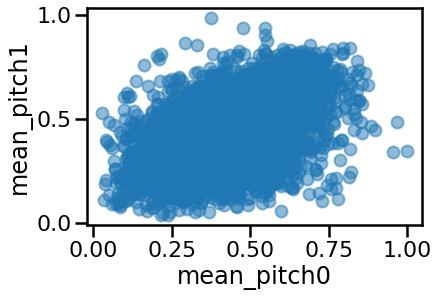

In [55]:
import matplotlib.pyplot as plt

plt.scatter(df_aux['mean_pitch0'], df_aux['mean_pitch1'],alpha=0.5)
plt.xlabel('mean_pitch0')
plt.ylabel('mean_pitch1')
plt.show()

In [65]:
 df_aux.columns[1:8]

Index(['mean_pitch0', 'mean_pitch1', 'mean_pitch2', 'mean_pitch3',
       'mean_pitch4', 'mean_pitch5', 'mean_pitch6'],
      dtype='object')

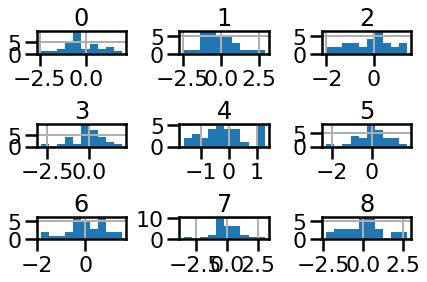

In [83]:
#for col in df_aux.columns:
#  plt.hist(df_aux[col], bins =5)
#  plt.show()

#import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt

font = {
        'size'   : 9}

plt.rc('font', **font)


def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name)
        
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


#draw_histograms(df_aux, df_aux.columns[0:9], 3, 3)

test = pd.DataFrame(np.random.randn(30, 9), columns=map(str, range(9)))
draw_histograms(test, test.columns, 3, 3)
  

Hacemos el join final de todos los dataframes


In [45]:
df_tot=pd.merge(df_aux, df_tracks2, on='id', how='inner')
df_tot.head()


id  ...                          album_name
0  00At7PWydsvg7g5xgaYan9  ...  All I Know EP (feat. Luke Bingham)
1  00BgcUYkIImsDN5rNjkR1U  ...                           Feel Good
2  00WgnFIsY1y84p7mYAJRuF  ...                      Omega Point EP
3  00X2ieWUjpzdNwDU2Jlg6i  ...               A Jackknife to a Swan
4  00isAURAZeKQXv6CW2vckb  ...                     Divine Redeemer

[5 rows x 68 columns]

In [46]:
df_tot.shape

(4082, 68)

In [47]:
# vuelvo a hacer join con todas las variables
df_tot=pd.merge(df_tot, df_af, on='id', how='inner')
df_tot.head()

id  mean_pitch0  ...  valence_log  speechiness_log
0  00At7PWydsvg7g5xgaYan9     0.372569  ...     1.482832        -1.228413
1  00BgcUYkIImsDN5rNjkR1U     0.255472  ...    -2.060457        -1.304518
2  00WgnFIsY1y84p7mYAJRuF     0.523316  ...    -1.973626        -1.146910
3  00X2ieWUjpzdNwDU2Jlg6i     0.581520  ...     0.994623        -1.263603
4  00isAURAZeKQXv6CW2vckb     0.369134  ...    -2.300277        -1.319664

[5 rows x 78 columns]

In [48]:
df_tot.shape

(4082, 78)